# Support Vector Machines for Energy-Efficiency Classification
<hr>
### Energy-Efficiency Classification

We would be studying Support Vector Machines by looking at the Energy Efficiency Dataset which contains assessment of the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.  

The creators of the dataset performed energy analysis using 12 different building shapes simulated in Ecotect. The buildings differed with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. They simulated various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. 

The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

You can download the dataset from : https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). Our aim will be to use the eight features to classify the two responses y1 and y2 as high or low.

Specifically:

* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load
* y2 Cooling Load

Save the downloaded `ENB2012_data.xlsx` in the current directory as your code. We then load it into a Pandas Dataframe using the read_excel() function. For this to work, you might have to run **`pip install xlrd`** if you don't already have the 'xlrd' module.

In [1]:
import pandas as pd
# read .csv from provided dataset
excel_filename="ENB2012_data.xlsx"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_excel(excel_filename)

We take a look at our data:

In [2]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


As you can see via the df.describe() method, the mean for our target variables Y1 and Y2 is approx 22 and 24 respectively. Since the data for y1 and y2 is continuous, we will use the following piece of code to convert it into either high or low.

We do this by defining all those y1 and y2 values above or 20 are high and those below 20 are low. We then map 1 for high and 0 for low.

In [4]:
# handle Y1 and Y2 attrubte to binary [High Hl and CL; and Low HL and Cl]
high = df.Y1 >= 20
low = df.Y1 < 20
df.loc[high,'Y1'] = 1
df.loc[low,'Y1'] = 0

high2 = df.Y2 >= 20
low2 = df.Y2 < 20
df.loc[high2,'Y2'] = 1
df.loc[low2,'Y2'] = 0

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.0,1.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.0,1.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.0,1.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.0,1.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,1.0,1.0


Now we have converted the dataset into a binary classification task. We can observe that the data for y1 and y2 is either 0 or 1, i.e the Energy Efficiency is low if its 0 or high if its 1.

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,0.483073,0.546875
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,0.500039,0.498122
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,0.000000,0.000000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,0.000000,1.000000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,1.000000,1.000000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,1.000000,1.000000


We specify our features and target variables:

In [7]:
features=list(df.columns[:-2])

In [8]:
X = df[features]
y1 = df['Y1']
y2 = df['Y2']

In [9]:
y2.unique()

array([ 1.,  0.])

In [10]:
X.shape, y1.shape, y2.shape

((768, 8), (768,), (768,))

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Splitting data into 60% training and 40% test data:

In [11]:
from sklearn import cross_validation, metrics
from sklearn.cross_validation import train_test_split

# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y1, test_size=0.4, random_state=0)
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(X,y2, test_size=0.4, random_state=0)

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

For Classification into Y1

Feature ranking:
1. feature 4 - X5 (0.350375) 
2. feature 3 - X4 (0.312105) 
3. feature 1 - X2 (0.139400) 
4. feature 0 - X1 (0.118307) 
5. feature 2 - X3 (0.029773) 
6. feature 6 - X7 (0.025721) 
7. feature 7 - X8 (0.021366) 
8. feature 5 - X6 (0.002953) 


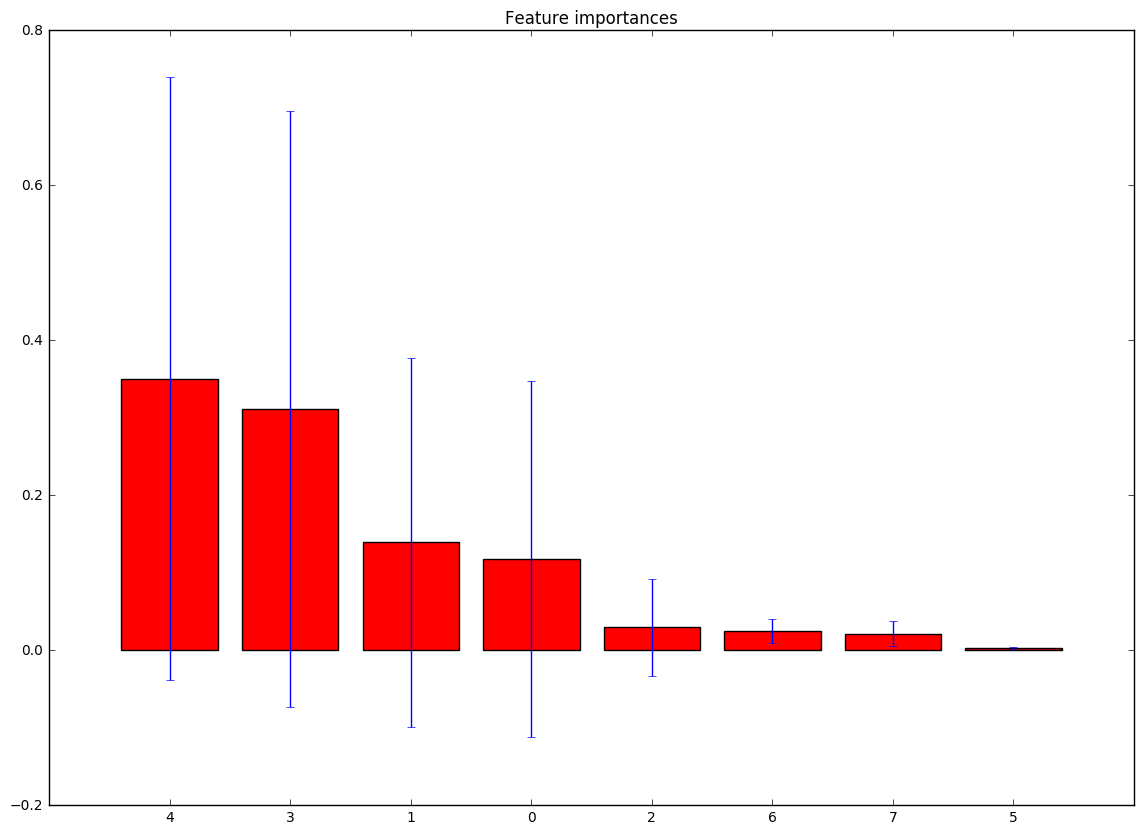

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 4 - X5 (0.350375)
2. feature 3 - X4 (0.312105)
3. feature 1 - X2 (0.139400)
4. feature 0 - X1 (0.118307)
5. feature 2 - X3 (0.029773)


In [14]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

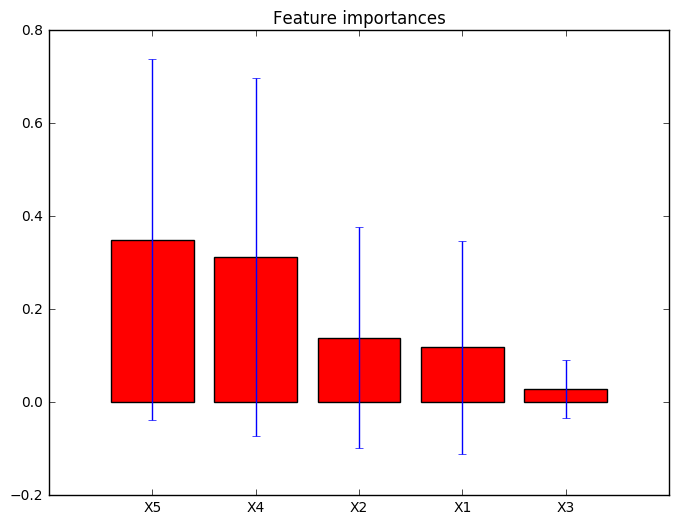

In [15]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

For Classification into Y2

Feature ranking:
1. feature 3 - X4 (0.303510) 
2. feature 4 - X5 (0.300616) 
3. feature 1 - X2 (0.140325) 
4. feature 0 - X1 (0.137824) 
5. feature 2 - X3 (0.057110) 
6. feature 6 - X7 (0.046795) 
7. feature 7 - X8 (0.010409) 
8. feature 5 - X6 (0.003411) 


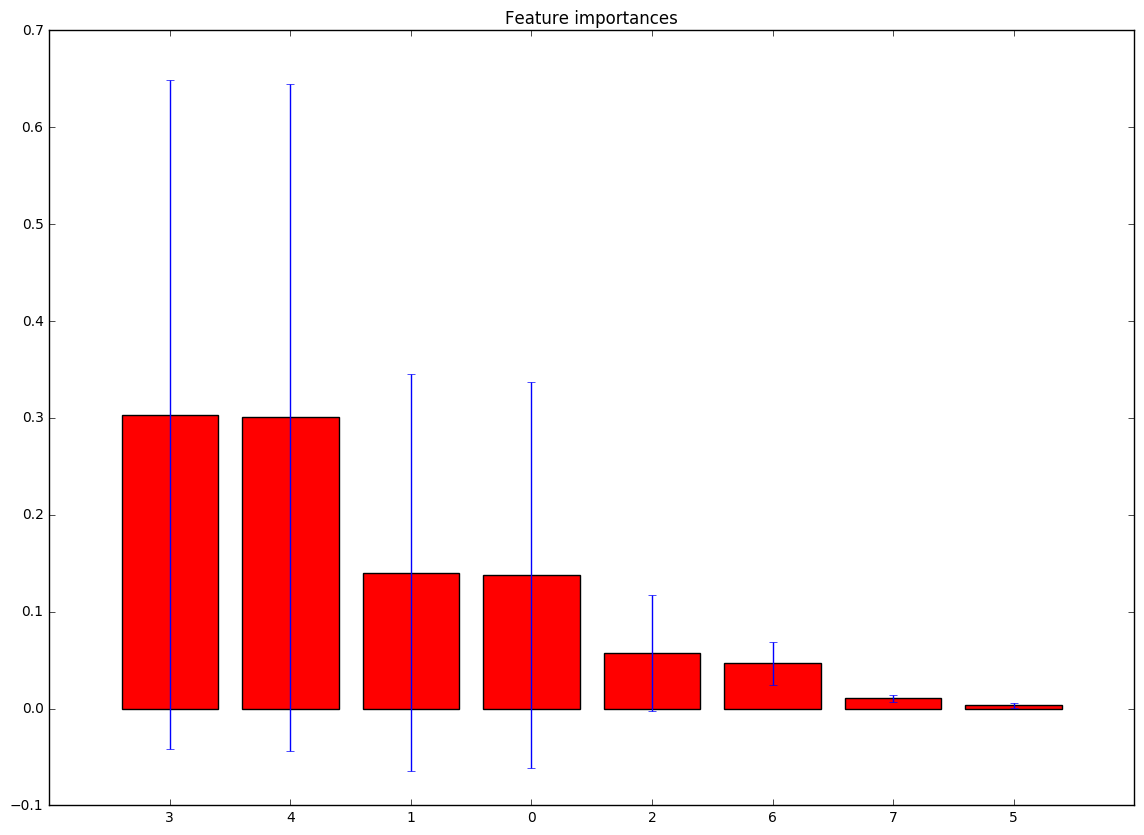

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 3 - X4 (0.303510)
2. feature 4 - X5 (0.300616)
3. feature 1 - X2 (0.140325)
4. feature 0 - X1 (0.137824)
5. feature 2 - X3 (0.057110)


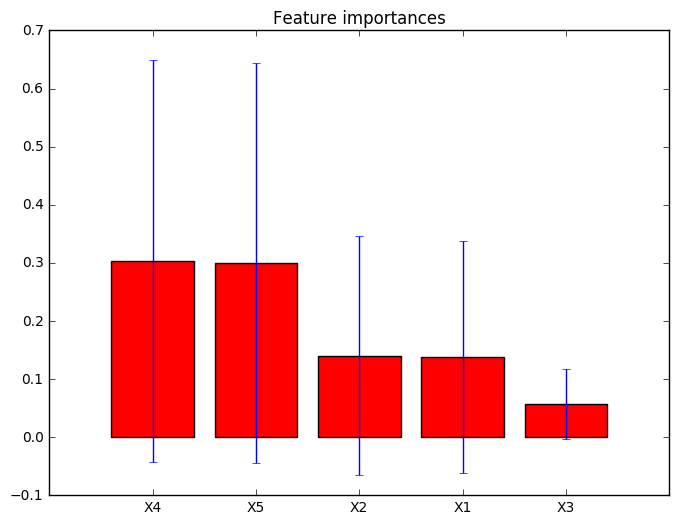

In [18]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

So for both Y1 and Y2, X4 and X5 are the most important features.

___
## Maximum margin classification with Support Vector Machines

Support Vector Machines(SVM) is a powerful and widely used learning algorithm. In other classification approaches we aim to minimize the classification error. Whereas in SVMs, our approach to acheive optimization is to maximize the margin. Here the margin is defined as the distance between the separating hyperplane also called as the decision boundary and the training samples that are closest to this hyperplane, which are the so-called support vectors. This can be understood from the following figure:

<img src="images/svm.png">

### Dealing with the nonlinearly separable case using slack variables

Scikit-Learn implementation of SVMs provide us parameters to fine tune our algorithm implementions. These paramaters are explained according to Scikit-Learn documentation as follows:

1. **The gamma parameter** : Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

2. **The C parameter** : The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

You can better understand the use of these parameters in plotting the SVM classification from this [link](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

Essentially using the variable C, we can control the penalty for misclassification error. Large values of C account for large error penalties whereas smaller values for C means we are less strict about misclassification. We can then we use the parameter C to control the 'width' of the margin and therefore tune the bias-variance trade-off as illustrated in the following figure:

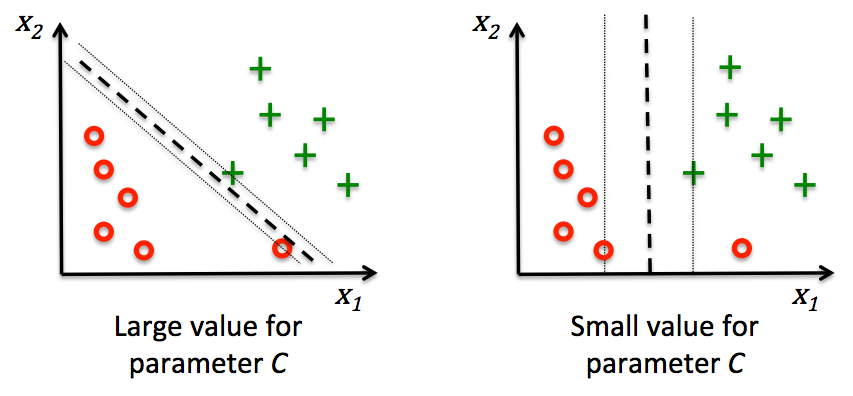

In [21]:
Image(filename='./images/03_08.png', width=600) 

[[image source]](https://github.com/rasbt/python-machine-learning-book/tree/master/images/image_gallery)

This concept is related to regularization, as increasing the value of C increases the bias and lowers the variance of the model.

Now that we learned the basic concepts behind the linear SVM, let's train a SVM model to classify :

In [19]:
from time import time
from sklearn.svm import SVC

t7=time()
print ("SVM")
svc = SVC(kernel='linear', C=1.0, random_state=0)
svc2 = SVC(kernel='linear', C=1.0, random_state=0)

clf_svc=svc.fit(X_train, y_train)
clf_svc2=svc2.fit(X_train, y_train2)

print ("Acurracy for Y1: ", clf_svc.score(X_test,y_test))
print ("Acurracy for Y2: ", clf_svc2.score(X_test2,y_test2))

t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy for Y1:  0.974025974026
Acurracy for Y2:  0.970779220779
time elapsed:  0.15600895881652832


### cross validation for SVM

In [20]:
tt7=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc, X,y1, cv=5)
scores2 = cross_validation.cross_val_score(svc2, X,y2, cv=5)
print ("For Y1") 
print (scores )
print (scores.mean())
print ("For Y2") 
print (scores2)
print (scores2.mean())
tt8=time()
print ("time elapsed: ", tt8-tt7)

cross result========
For Y1
[ 0.91612903  1.          1.          1.          1.        ]
0.983225806452
For Y2
[ 1.          1.          0.92207792  0.92156863  0.92156863]
0.953043035396
time elapsed:  1.7180981636047363


Using the default implementation of SVM in Scikit-Learn, we achieved 98 percent accuracy for classifying Y1 i.e Heating load as high or low and 95 percent accuracy for classiying Y2 i.e Cooling load.

In [21]:
from time import time
from sklearn.svm import LinearSVC

t7=time()
print ("SVM")

svc = LinearSVC(C=1.0, random_state=0)
svc2 = LinearSVC(C=1.0, random_state=0)

clf_svc=svc.fit(X_train, y_train)
clf_svc2=svc2.fit(X_train, y_train2)

print ("Acurracy for Y1: ", clf_svc.score(X_test,y_test))
print ("Acurracy for Y2: ", clf_svc2.score(X_test2,y_test2))

t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy for Y1:  0.974025974026
Acurracy for Y2:  0.74025974026
time elapsed:  0.054003000259399414


### cross validation for SVM

In [22]:
tt7=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc, X,y1, cv=5)
scores2 = cross_validation.cross_val_score(svc2, X,y2, cv=5)
print ("For Y1") 
print (scores )
print (scores.mean())
print ("For Y2") 
print (scores2)
print (scores2.mean())
tt8=time()
print ("time elapsed: ", tt8-tt7)

cross result========
For Y1
[ 0.91612903  0.72727273  1.          1.          0.76470588]
0.881621528377
For Y2
[ 0.7012987   0.93506494  0.92207792  0.92156863  0.92156863]
0.880315762669
time elapsed:  0.3260188102722168


As you can see we achieved 88 percent accuracy for classifying both Y1 and Y2 using the LinearSVC variant of SVM implementation in Scikit-Learn.

<hr>

### Logistic regression versus SVM
In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional probabilities of the training data, which makes it more prone to misclassifying abnormal data points or outliers whereas this is not the case with SVMs. The SVMs try to find a the decision boundary or support vectors that are farthest from the closest points in average. Logistic regression has the advantage over SVMs due to it's simpler implementation. Furthermore, logistic regression models can be easily updated, which is useful when working with streaming data.
<hr>

## Solving non-linear problems using a kernel SVM

Another reason why SVMs are highly popular among machine learning practitioners is that they can be used to solve nonlinear classification problems by what are called as kernels. Before we discuss the main concept behind kernel SVM, let's first define and create a sample dataset to see how such a nonlinear classification problem may look.
Using the following code, we will create a simple dataset that has the form of
an XOR gate using the logical_xor function from NumPy, where 100 samples
will be assigned the class label 1 and 100 samples will be assigned the class
label -1, respectively:


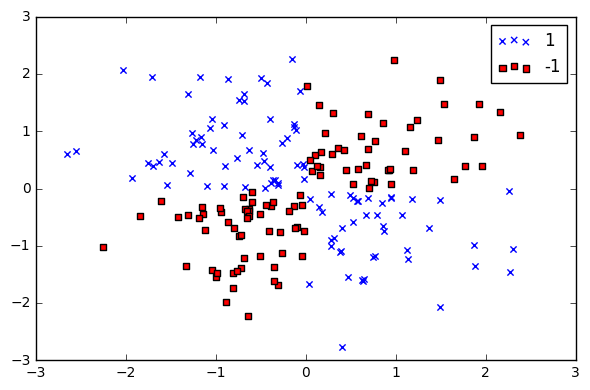

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

After executing the code, we will have an XOR dataset with random noise,
as shown.

As you might have noticed, the LinearSVM model that we used earlier would fail to classify samples as positive or negative using a simple linear hyperplane as the decision boundary.
To do this, we use the kernel methods to deal with such linearly inseparable data. The basic idea behind kernel methods is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function where it becomes linearly separable. As shown in the next figure, we can transform a two-dimensional dataset onto a new three-dimensional feature space where the classes become separable

This allows us to separate the two classes shown in the plot via a linear hyperplane that becomes a nonlinear decision boundary if we project it back onto the original feature space:

<img src="images/svmd.png">

## Using the kernel trick to find separating hyperplanes in higher dimensional space

Roughly speaking, the term kernel can be interpreted as a similarity function between a pair of samples. The minus sign inverts the distance measure into a similarity score and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar samples) and 0 (for very dissimilar samples).

Let's try to train a kernel SVM that that can draw a nonlinear decision boundary separating the XOR data well. Here, we simply use the SVC class from scikit-learn that we imported earlier and replace the parameter kernel='linear' with kernel='rbf':

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

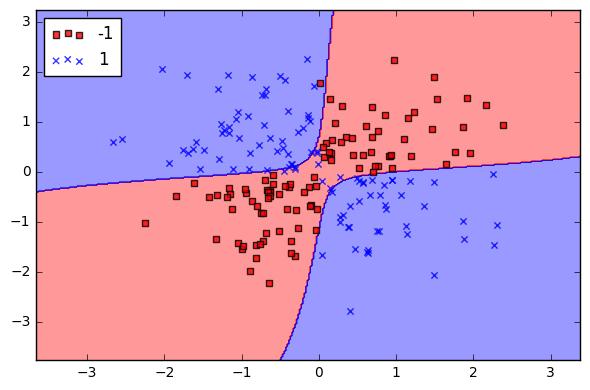

In [26]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_xor.png', dpi=300)
plt.show()

As we can see in the resulting plot, the kernel SVM separates the XOR data relatively well. 

The gammaa parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for gammaa, we increase the influence or reach of the training samples, which leads to a softer decision boundary. 

We can use the rbf kernel to classify our data as well:

In [27]:
from time import time
from sklearn.svm import SVC

t7=time()
print ("SVM")
svc = SVC(kernel='rbf', gamma=0.7, C=1.0, random_state=0)
svc2 = SVC(kernel='rbf', gamma=0.7,  C=1.0, random_state=0)

clf_svc=svc.fit(X_train, y_train)
clf_svc2=svc2.fit(X_train, y_train2)

print ("Acurracy for Y1: ", clf_svc.score(X_test,y_test))
print ("Acurracy for Y2: ", clf_svc2.score(X_test2,y_test2))

t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy for Y1:  0.977272727273
Acurracy for Y2:  0.967532467532
time elapsed:  0.09100508689880371


This gives an accuracy of 97 percent for Y1 (Heating load) and 96 percent for Y2 (Cooling load) which proves the effiency of Support Vector Machines. Actually, before the boom of Neural Networks and Deep Learning in general, SVMs enjoyed a lot of popularity amongs Machine Learning practitioners for a wide range of tasks. However, although support vector machines are powerful linear models that can be extended to nonlinear problems via the kernel trick, they have many parameters that have to be tuned in order to make good predictions. 

____